In [16]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from tqdm import trange, tqdm
sns.set_context("paper", font_scale=1.5)

In [23]:
rec_215_3d = np.load("rec_err_3d/rec_err_215.npy")
rec_60_2d = np.load("rec_errors_60_comp.npy")

In [28]:
rec_60_2d.shape

(60, 12484)

In [64]:
rec_215_3d.shape

(12484,)

In [ ]:
# "steelblue"


3d quantile:  0.02697435201656303
2d quantile:  0.02189285137745911


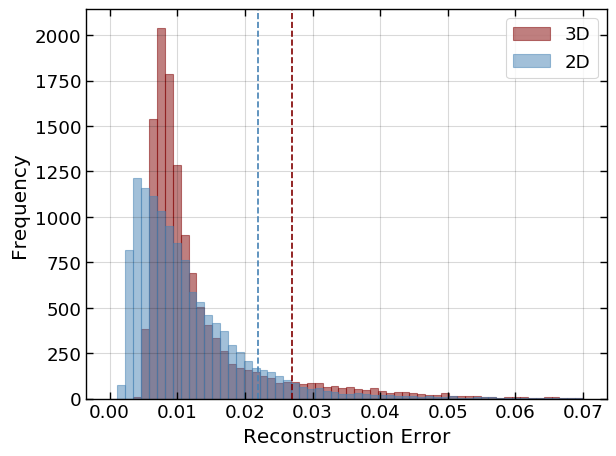

In [63]:
n_bins = 60
xrange = (0,0.07)
histtype = "bar"

plt.hist(rec_215_3d, bins=n_bins, color="maroon", alpha = 0.5, range = xrange, edgecolor = "maroon", label = "3D",histtype=histtype)
plt.hist(rec_60_2d[59], bins=n_bins, color="steelblue", alpha = 0.5, range = xrange, edgecolor = "steelblue", label = "2D", histtype=histtype)


quantile90_3d = np.quantile(rec_215_3d, 0.9)
quantile90_2d = np.quantile(rec_60_2d[59], 0.9)
print("3d quantile: ", quantile90_3d)
print("2d quantile: ", quantile90_2d)
plt.axvline(quantile90_3d, color="maroon", linestyle = "--")
plt.axvline(quantile90_2d, color="steelblue", linestyle = "--")




plt.grid()
plt.tick_params(bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='black', grid_alpha=0.15)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig("plots/RE_90expl_variance.pdf", dpi=300, bbox_inches="tight")

In [ ]:
all_err = np.array([calc_rec_error(i) for i in trange(1,len(eigengalaxies)+1)])

In [91]:
RE_quant_3d = []
RE_quant_2d = []
n_eigen = []
for ncomp in range(1,215,10):
    err = np.load(f"rec_err_3d/rec_err_{ncomp}.npy")
    err2d = np.load(f"rec_err_2d/rec_err_{ncomp}.npy")
    RE_quant_3d.append(np.quantile(err,0.9))
    RE_quant_2d.append(np.quantile(err2d,0.9))
    n_eigen.append(ncomp)



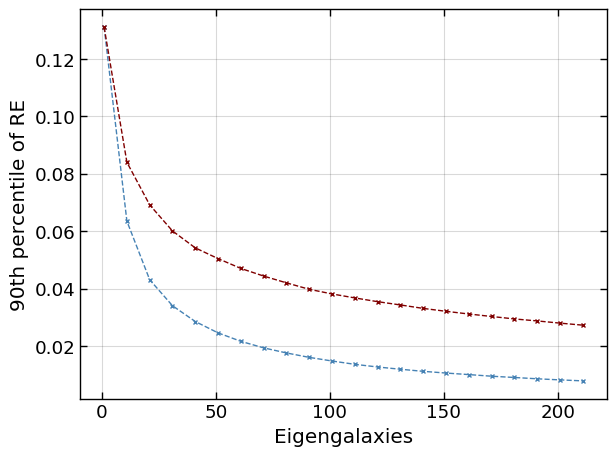

In [95]:
length = len(RE_quant_3d)
#plt.figure(figsize=(5,5))
plt.plot(n_eigen, RE_quant_2d, marker="x", color="steelblue", linestyle="dashed", linewidth=1, markersize=3,)
plt.plot(n_eigen, RE_quant_3d, marker="x", color="maroon", linestyle="dashed", linewidth=1, markersize=3,)
plt.xlabel("Eigengalaxies")
plt.ylabel("90th percentile of RE")
plt.grid()
plt.tick_params(bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='black', grid_alpha=0.15)
plt.tight_layout()
plt.savefig("plots/90th_percentile_RE.pdf", dpi=300, bbox_inches='tight')

In [99]:
np.where(np.array(RE_quant_3d)<0.05)

(array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),)

In [102]:
n_eigen[6]

61

In [ ]:

for n in range(10,100,10):
    error = calc_rec_error(n)
    
    plt.hist(reconstruction_error, bins=100, color="steelblue", alpha = 0.5, edgecolor="black", range=(0,0.1))
plt.tick_params(bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='black', grid_alpha=0.5)
plt.xlabel("Reconstruction error")
plt.ylabel("Frequency")
plt.tight_layout()